In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('RTA Dataset.csv')
print(df.head())
print(df.info())
print(df.describe())

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [3]:
print(df.isnull().sum())
df['Age_band_of_driver'].fillna('Unknown', inplace=True)
df['Sex_of_driver'].fillna('Unknown', inplace=True)
df['Accident_severity'] = df['Accident_severity'].str.strip()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

C:\Users\KRISHNAJI S\AppData\Local\Temp\ipykernel_28600\1571415947.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_band_of_driver'].fillna('Unknown', inplace=True)
C:\Users\KRISHNAJI S\AppData\Local\Temp\ipykernel_28600\1571415947.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

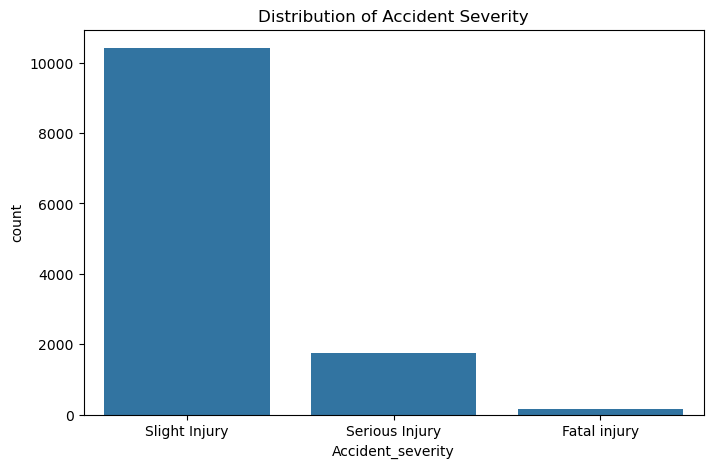

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Accident_severity')
plt.title('Distribution of Accident Severity')
plt.show()

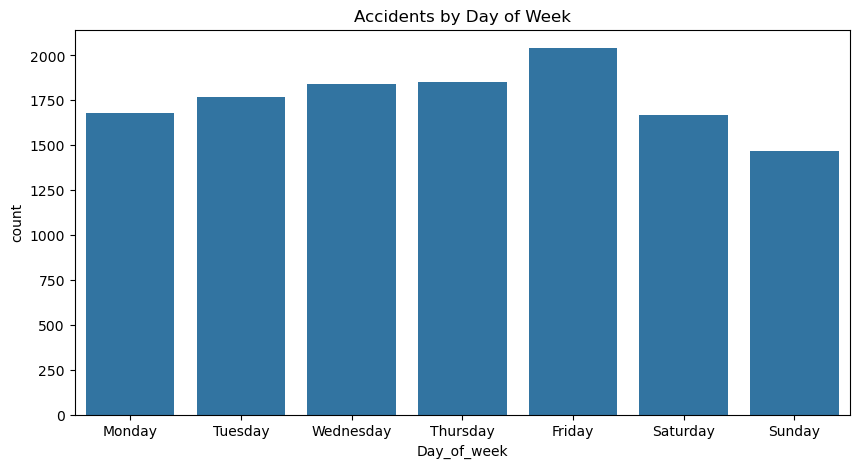

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Day_of_week', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Accidents by Day of Week')
plt.show()

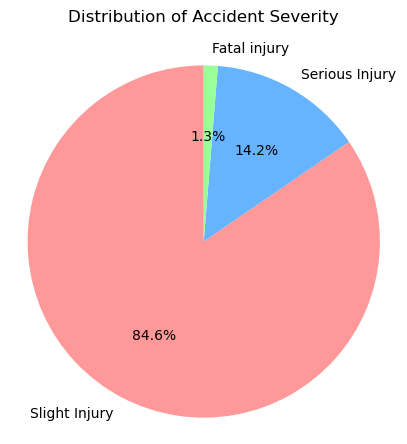

In [7]:
severity_counts = df['Accident_severity'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Accident Severity', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

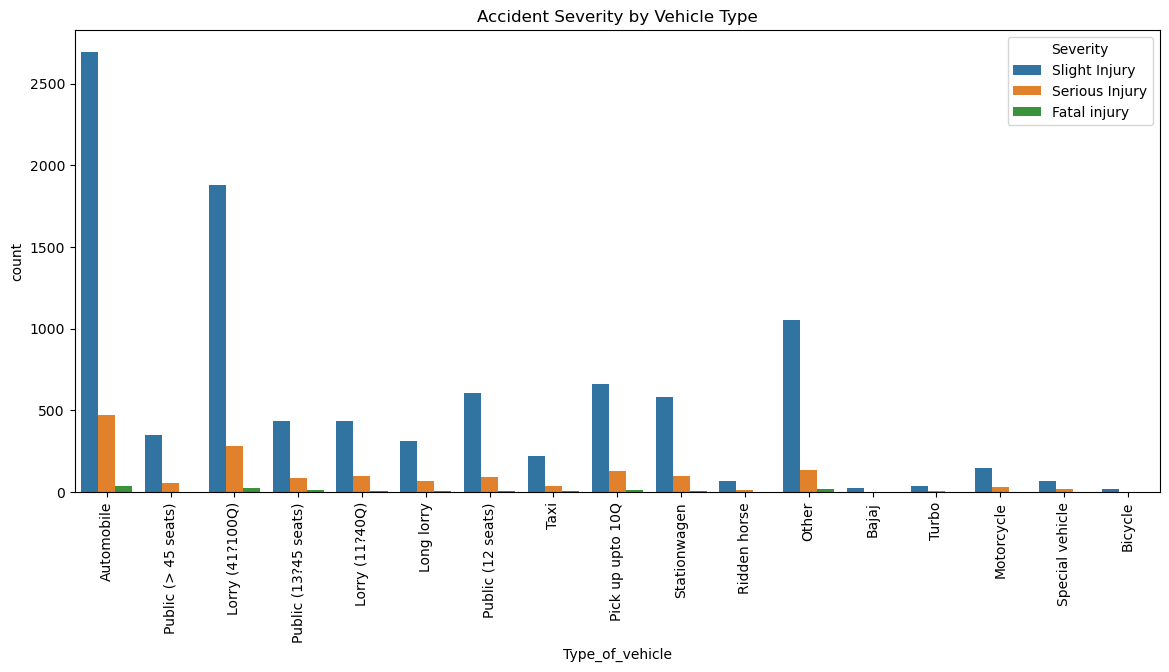

In [8]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Type_of_vehicle', hue='Accident_severity')
plt.title('Accident Severity by Vehicle Type')
plt.xticks(rotation=90)
plt.legend(title='Severity')
plt.show()

C:\Users\KRISHNAJI S\AppData\Local\Temp\ipykernel_28600\2978862445.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


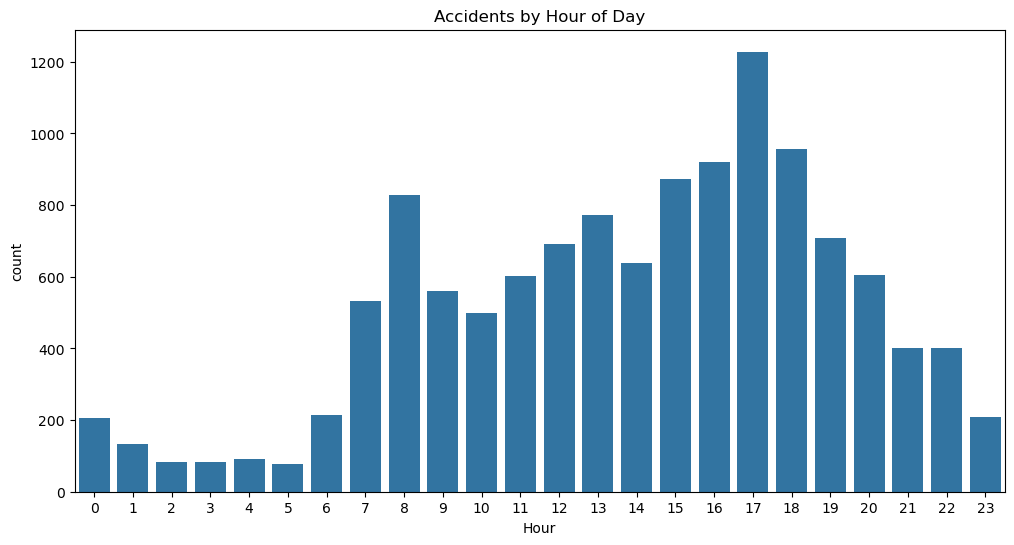

In [9]:
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Hour')
plt.title('Accidents by Hour of Day')
plt.show()